# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import pingouin as pg # Install pingouin stats package (pip install pingouin)
import seaborn as sns # Install seaborn data visualization library (pip install seaborn)
from scipy.stats import pearsonr
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
cities

637


['hobyo',
 'carnarvon',
 'margate',
 'sept-iles',
 'atuona',
 'trat',
 'pringsewu',
 'fevralsk',
 'puerto ayora',
 'karakol',
 'chuy',
 'sinnamary',
 'lingao',
 'saint anthony',
 'ruatoria',
 'vanimo',
 'nizhneyansk',
 'kodiak',
 'rikitea',
 'fort saint john',
 'ushuaia',
 'atar',
 'marsaxlokk',
 'cidreira',
 'bambous virieux',
 'vaini',
 'ribeira grande',
 'mataura',
 'dikson',
 'pimentel',
 'kapaa',
 'naco',
 'taolanaro',
 'hithadhoo',
 'belushya guba',
 'darnah',
 'esperance',
 'tuktoyaktuk',
 'tomohon',
 'shenjiamen',
 'gornopravdinsk',
 'jamestown',
 'nishihara',
 'boda',
 'severo-kurilsk',
 'cape town',
 'raga',
 'lavrentiya',
 'fare',
 'cap malheureux',
 'bara',
 'kaitangata',
 'mys shmidta',
 'zwedru',
 'idah',
 'matam',
 'touros',
 'albany',
 'hobart',
 'boa vista',
 'codrington',
 'san patricio',
 'armacao dos buzios',
 'herat',
 'port alfred',
 'fairbanks',
 'gombong',
 'butaritari',
 'prince rupert',
 'bluff',
 'deputatskiy',
 'bathsheba',
 'tiksi',
 'victoria point',
 'gui

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
cities_list = []
temps_list = []
lat_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []

url = "http://api.openweathermap.org/data/2.5/weather?"
#print(requests.get(url))
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    
    try:
        temp = weather_json["main"]["temp"]
        lat = weather_json["coord"]["lat"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json["clouds"]["all"]
        wind_speed = weather_json["wind"]["speed"]
        
        print(f"The temperature in {city} is {temp} ºF.")
        cities_list.append(city)
        temps_list.append(temp)
        lat_list.append(lat)
        humidity_list.append(humidity)
        cloudiness_list.append(cloudiness)
        wind_speed_list.append(wind_speed)
       
        
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")

#weatherCities_df = pd.DataFrame(temp)

The temperature in hobyo is 79.18 ºF.
The temperature in carnarvon is 84.2 ºF.
The temperature in margate is 35.29 ºF.
The temperature in sept-iles is -7.6 ºF.
The temperature in atuona is 81.46 ºF.
The temperature in trat is 90.19 ºF.
The temperature in pringsewu is 88.36 ºF.
Missing field/result... skipping.
The temperature in puerto ayora is 77 ºF.
The temperature in karakol is 19.38 ºF.
The temperature in chuy is 65.48 ºF.
The temperature in sinnamary is 79.77 ºF.
The temperature in lingao is 70.81 ºF.
The temperature in saint anthony is 0.5 ºF.
Missing field/result... skipping.
The temperature in vanimo is 82.72 ºF.
Missing field/result... skipping.
The temperature in kodiak is 35.6 ºF.
The temperature in rikitea is 78.19 ºF.
Missing field/result... skipping.
The temperature in ushuaia is 46.4 ºF.
The temperature in atar is 58.14 ºF.
The temperature in marsaxlokk is 54.39 ºF.
The temperature in cidreira is 73.42 ºF.
The temperature in bambous virieux is 85.17 ºF.
The temperature i

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [73]:
city_temps_df = pd.DataFrame(temps_list, cities_list)

city_temps_df.to_csv('output_data/city_temps.csv')

city_temps_df

,0
hobyo,79.18
carnarvon,84.20
margate,35.29
sept-iles,-7.60
atuona,81.46
...,...
richards bay,75.51
haverfordwest,33.94
maryville,46.13
mehamn,12.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

           n      r           CI95%     r2  adj_r2          p-val       BF10  \
pearson  591 -0.781  [-0.81, -0.75]  0.609   0.608  2.508412e-122  3.39e+118   

         power  
pearson    1.0  


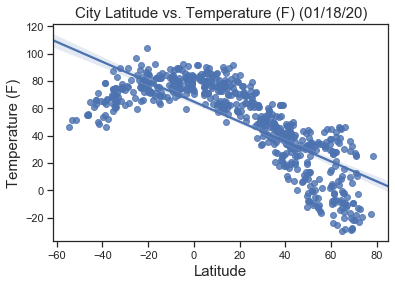

In [98]:
# lat_temp = plt.scatter(lat_list, temps_list)
# plt.show()

print(pg.corr(lat_list, temps_list))

sns.regplot(lat_list, temps_list)
plt.title('City Latitude vs. Temperature (F) (%s)' % time.strftime('%x'), fontsize = 15) # title with fontsize 20
plt.xlabel('Latitude', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Temperature (F)', fontsize = 15) # y-axis label with fontsize 15


plt.show()

#### Latitude vs. Humidity Plot

           n     r        CI95%     r2  adj_r2     p-val   BF10  power
pearson  591  0.12  [0.04, 0.2]  0.014   0.011  0.003533  3.591  0.832


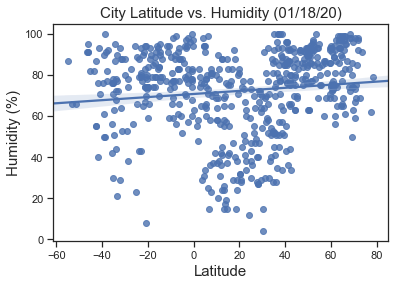

In [97]:
# lat_humidity = plt.scatter(lat_list, humidity_list)
# plt.show()

print(pg.corr(lat_list, humidity_list))

sns.regplot(lat_list, humidity_list)
plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'), fontsize = 15) # title with fontsize 20
plt.xlabel('Latitude', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Humidity (%)', fontsize = 15) # y-axis label with fontsize 15


plt.show()

#### Latitude vs. Cloudiness Plot

           n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  591  0.061  [-0.02, 0.14]  0.004     0.0  0.135754  0.156   0.32


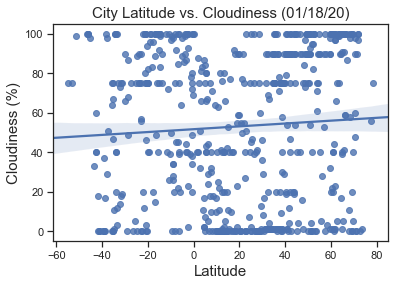

In [96]:
# lat_cloudiness = plt.scatter(lat_list, cloudiness_list)
# plt.show()

print(pg.corr(lat_list, cloudiness_list))

sns.regplot(lat_list, cloudiness_list)
plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'), fontsize = 15) # title with fontsize 20
plt.xlabel('Latitude', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Cloudiness (%)', fontsize = 15) # y-axis label with fontsize 15


plt.show()

#### Latitude vs. Wind Speed Plot

           n      r          CI95%     r2  adj_r2     p-val   BF10  power
pearson  591  0.031  [-0.05, 0.11]  0.001  -0.002  0.451267  0.068  0.117


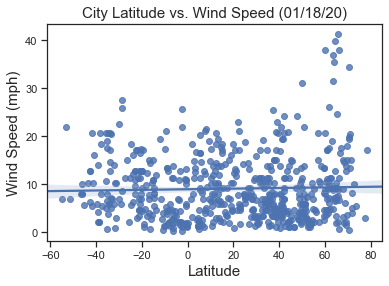

In [95]:
# lat_wind = plt.scatter(lat_list, wind_speed_list)
# plt.show()
print(pg.corr(lat_list, wind_speed_list))

sns.regplot(lat_list, wind_speed_list)
plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'), fontsize = 15) # title with fontsize 20
plt.xlabel('Latitude', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Wind Speed (mph)', fontsize = 15) # y-axis label with fontsize 15


plt.show()



ValueError: x and y must have the same length.